# [ SQL PROJECT ] OPTIMISE PROFIT WITH DATA DRIVEN DECISIONS


## INTRODUCTION

In this project, we are going to use Chinook database, provided as a SQLite database file called `chinook.db` to answer some business questions. Chinook database tries to simulate the sort of database that most businesses use in reality, it contains information about a fictional digital music shop - kind of like a mini-iTunes store. The Chinook database contains information about the artists, songs, and albums from the music shop, as well as information on the shop's employees, customers, and the customers purchases. This information is contained in eleven tables.

Here is Chinook database's schema diagram, which will help us understand the available columns and the structure of our data.

In [1]:
from IPython.core.display import SVG
SVG(filename='Chinook schema diagram.svg')

In this project, we will majorly use SQL skills to find the answer for our problems. Besides, we will also use pandas, matplotlib and Power BI to visualize our results. We need to find the answers for these questions:
* PROBLEM 1: Which deals should be accepted?
* PROBLEM 2: Some recommendations for a new marketing campaign in top 3 big markets
* PROBLEM 3: Should we change the purchasing strategy?
* PROBLEM 4: Find the percentage of tracks unsold, any recommendation?
* PROBLEM 5: Employee performance
### Summary of result

* The best 3 albums for the USA market are Red Tone (Punk), Slim Jim Bites (Blues), Meteor and the Girls (Pop).
* Our top 3 markets based on the value of total sales are the USA, Canada and Brazil. We pointed out some bussiness metrics and indicated some recommendation for the new marketing campaign.
* We found that 33% of our customers make an album purchase, so we need to concern more carefully, it is better to identify exactly the P&L of this sector before making final decisions.
* It's time to optimize our profit, because at present only 51.56% of our tracks generate revenue in our entreprise. Some recommendations have been provided to improve the situtation.
* Employee performance: Jane Peacock is the best seller with $ 1731.51 total sales value, while Margaret Park has the most number of customer of 214 individuals.

For more details, please refer to the full analysis below.

# CONNECT TO DATABASE

In [2]:
%%capture
%load_ext sql
%sql sqlite:///chinook.db

# DATABASE OVERVIEW

Let's verify the tables and views existing in our database.

In [3]:
%%sql
SELECT
    name,
    type
FROM sqlite_master
WHERE type IN ("table","view");

 * sqlite:///chinook.db
Done.


name,type
album,table
artist,table
customer,table
employee,table
genre,table
invoice,table
invoice_line,table
media_type,table
playlist,table
playlist_track,table


# PROBLEM SOLUTIONS

## Problem 1: Which deals should be accepted?

Suppose that our store, Chinook has just signed a deal with a new record label, they recorded 4 albumns by 4 singers, and our manager provided us the name of artists and their genre of music, required us to select the first 3 albumns that will be added to the store, from a list of four. These artists have no track in the store right now.

The artists will give Chinook some money to advertise the new albums, they are all from USA and the target market is USA too (i.e. We are interested in finding out which genres sell the best in the USA). We have the artists' name and the genre of music they produce as follows:

| **Artist Name**      | **Genre** |
|----------------------|-----------|
| Regal                | Hip-Hop   |
| Red Tone             | Punk      |
| Meteor and the Girls | Pop       |
| Slim Jim Bites       | Blues     |

We need to:
- **Find out which genres sell the most tracks in the USA**:
    + in absolute numbers
    + in percentages
- And **make a recommendation for the three artists** whose albums we should purchase for the store.

In [4]:
%%sql
-- Create a view showing information of the US sales
WITH usa_sales AS
            (SELECT il.track_id,
                    t.genre_id,
                    t.album_id
               FROM track t
              INNER JOIN invoice_line il ON t.track_id = il.track_id 
              INNER JOIN invoice i ON il.invoice_id = i.invoice_id
              WHERE i.billing_country = 'USA')

-- Count the number of tracks sold, categorized by genre
SELECT g.name genre,
       COUNT(us.track_id) tracks_sold,
       ROUND((COUNT(us.track_id)*100.0/(SELECT COUNT(*)
                                FROM usa_sales)),2) || '%' percentage_sold
  FROM usa_sales us
 INNER JOIN genre g ON g.genre_id = us.genre_id
 GROUP BY g.name
 ORDER BY 2 DESC
 LIMIT 10;

 * sqlite:///chinook.db
Done.


genre,tracks_sold,percentage_sold
Rock,561,53.38%
Alternative & Punk,130,12.37%
Metal,124,11.8%
R&B/Soul,53,5.04%
Blues,36,3.43%
Alternative,35,3.33%
Pop,22,2.09%
Latin,22,2.09%
Hip Hop/Rap,20,1.9%
Jazz,14,1.33%


In [5]:
top_10_usa_sales = _.DataFrame()

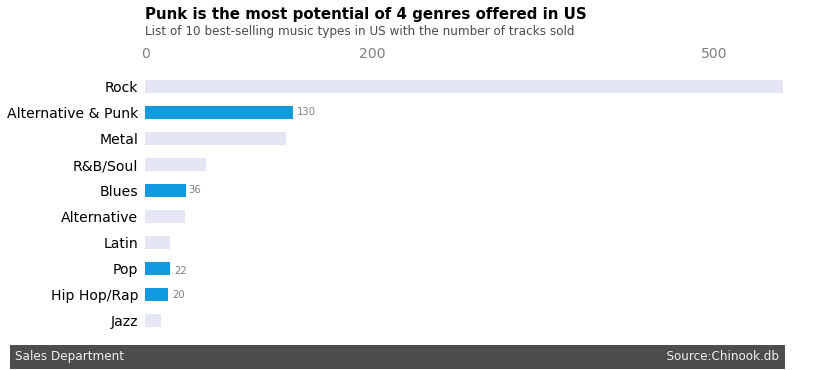

In [6]:
# Visualize our result

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

top_10_usa_sales = top_10_usa_sales.sort_values(by = 'tracks_sold') # sort the data to visualize the best seller genre first

fig,ax = plt.subplots(figsize=(12,5))
ax.barh(top_10_usa_sales['genre'],top_10_usa_sales['tracks_sold'], height = 0.5, color = '#e4e5f5')

# optimize data ink

# Remove spines
for location in ['left','right','bottom','top']:
    ax.spines[location].set_visible(False)
    
# Remove ticks
ax.tick_params(bottom=False,left=False)

# Make the bars less thick, remove some x-tick labels
ax.set_xticks([0,200,500])

# Move the tick labels at the top of the graph
ax.xaxis.tick_top()
ax.tick_params(top = False)

# Color x-tick labels in grey so that they don't stand out visually
ax.tick_params(axis='x', colors = 'grey')

# Change the size of x-tick and y-tick labels
ax.tick_params(axis='both', labelsize=14)

# To change the color of some specific columns
for t in ['Alternative & Punk','Blues','Pop','Hip Hop/Rap']:
    ax.barh(t,top_10_usa_sales[top_10_usa_sales['genre'] ==t]['tracks_sold'], height = 0.5, color = '#1199dd')
    
# Add labels for 4 special columns
ax.text(24,0.9,'20', color = 'grey')
ax.text(25,1.8,'22', color = 'grey')
ax.text(38,4.9,'36', color = 'grey')
ax.text(133,7.9,'130', color = 'grey')

# Add title and subtitle

ax.text(0,11.6,'Punk is the most potential of 4 genres offered in US',size = 15, weight ='bold') # add title
ax.text(0,11,'List of 10 best-selling music types in US with the number of tracks sold',size = 12,alpha=0.7)

# Add a signature

ax.text(-115,-1.5,'Sales Department' + ' '*140 + 'Source:Chinook.db',
         color = '#f0f0f0',
        backgroundcolor = '#4d4d4d',
        size = 12)

plt.show()


Based on the recorded sales data of our stores in US, we would recommend to choose 3 albums based on the list of artists in order of precedence as follows:

| **Artist Name**      | **Genre**   | **Order** |
|:---------------------|:------------|:---------:|
| Red Tone             | Punk        |     1     |
| Slim Jim Bites       | Blues       |     2     |
| Meteor and the Girls | Pop         |     3     |
| Regal                | Hip Hop/Rap |     4     |

Besides, we also noticed that Rock is the most popular genre of music in US, which counts for more than **50%** of our total sales in this country. Therefore, we should do more research and development in this type to enrich our offers to customers, such as improvement in recommendation list, adding more records or searching more deals with rock artists.

## Problem 2: Marketing campaign in top 3 big markets

Our manager informed that company decided to run a new marketing campaign in three biggest markets. We are asked to collate data on purchases in each country, including:

> * total number of customers
> * total value of sales
> * average value of sales per customer
> * average order value
> * the most popular type of music based on the number of tracks sold
> * the most beloved artist based on the number of tracks sold 
> * best-selling album based on the number of tracks sold 

For a country has only 1 customer, collect them into an 'Others' group. The results should be sorted by the total sales from highest to lowest.

Before we come up with the final table with all information required above, we will create a big table containing all columns that we need to answer our question. This new table will also group all countries with only 1 customer in one group called '**Others**', else we keep its name.

In [7]:
%%sql
DROP VIEW IF EXISTS countries_sales;
CREATE VIEW countries_sales AS -- Join all table needed to answer the problem
                        SELECT i.invoice_id, i.customer_id, i.billing_city, i.billing_country, i.total,
                               il.track_id,
                               t.album_id, t.genre_id,
                               ar.artist_id,
                               CASE -- put all countries with 1 customer in 1 group called 'Others'
                                   WHEN billing_country IN (SELECT billing_country 
                                                              FROM invoice
                                                             GROUP BY billing_country
                                                            HAVING COUNT(DISTINCT customer_id) = 1) THEN 'Others'
                                   ELSE billing_country
                               END AS country_remarked
                                
                        FROM invoice i
                        LEFT JOIN invoice_line il ON il.invoice_id = i.invoice_id
                        LEFT JOIN track t ON il.track_id = t.track_id
                        LEFT JOIN album al ON t.album_id = al.album_id
                        LEFT JOIN artist ar ON al.artist_id = ar.artist_id;

SELECT *
  FROM countries_sales
 LIMIT 5;

 * sqlite:///chinook.db
Done.
Done.
Done.


invoice_id,customer_id,billing_city,billing_country,total,track_id,album_id,genre_id,artist_id,country_remarked
1,18,New York,USA,15.84,1158,91,1,88,USA
1,18,New York,USA,15.84,1159,91,1,88,USA
1,18,New York,USA,15.84,1160,91,1,88,USA
1,18,New York,USA,15.84,1161,91,1,88,USA
1,18,New York,USA,15.84,1162,91,1,88,USA


Now we will devide our problem into smaller parts. We will create 4 tables, including:
* Table 1: Countries with statistical information
* Table 2: Countries with the most popular genres
* Table 3: Countries with the most beloved singers
* Table 4: Countries with the best-selling albums

Then we can use `country` column as a key to join 4 tables in 1.

### Table 1: Countries with statistical information

In this table we will calculate some numeric data for each country, such as:
* total number of customers
* total value of sales
* average value of sales per customer
* average order value

In [8]:
%%sql
-- Find some statistic information for each country.                        
DROP VIEW IF EXISTS countries_statistics;
CREATE VIEW countries_statistics AS

WITH countries_others AS -- put all countries with 1 customer in 1 group called 'Others'                         
                (SELECT *,
                        CASE
                            WHEN billing_country IN (SELECT billing_country 
                                                       FROM invoice
                                                      GROUP BY billing_country
                                                     HAVING COUNT(DISTINCT customer_id) = 1) THEN 'Others'
                            ELSE billing_country
                        END AS country_remarked       
                  FROM invoice)

SELECT country_remarked,
       COUNT(DISTINCT customer_id) num_customer,
       ROUND(SUM(total),2) total_sales_value,
       ROUND(SUM(total)/COUNT(DISTINCT customer_id),2) avg_sales_per_customer,
       ROUND(SUM(total)/COUNT(DISTINCT invoice_id),2) avg_order_value
  FROM countries_others
 GROUP BY country_remarked
 ORDER BY total_sales_value DESC;

SELECT *
FROM countries_statistics;

 * sqlite:///chinook.db
Done.
Done.
Done.


country_remarked,num_customer,total_sales_value,avg_sales_per_customer,avg_order_value
Others,15,1094.94,73.0,7.45
USA,13,1040.49,80.04,7.94
Canada,8,535.59,66.95,7.05
Brazil,5,427.68,85.54,7.01
France,5,389.07,77.81,7.78
Germany,4,334.62,83.66,8.16
Czech Republic,2,273.24,136.62,9.11
United Kingdom,3,245.52,81.84,8.77
Portugal,2,185.13,92.57,6.38
India,2,183.15,91.58,8.72


### Table 2: Countries with the most popular genres

Table 2 will aggregate the data to find the most popular genre and how many tracks sold in this genre in different countries.

In [9]:
%%sql
-- Find the most popular genres in each country
DROP VIEW IF EXISTS countries_top_genre;
CREATE VIEW countries_top_genre AS 

WITH country_genre_tracks AS
                        (SELECT country_remarked country,
                         genre_id,
                         COUNT(track_id) number_tracks_sold
                           FROM countries_sales
                          GROUP BY country, genre_id
                          ORDER BY number_tracks_sold DESC),
        
        country_max_tracks AS 
                        (SELECT country, 
                                MAX(number_tracks_sold) number_tracks_sold
                           FROM country_genre_tracks
                          GROUP BY country)
SELECT cmt.country,
       cmt.number_tracks_sold,
       cgt.genre_id
 FROM country_genre_tracks cgt
INNER JOIN country_max_tracks cmt ON cmt.country = cgt.country AND cmt.number_tracks_sold = cgt.number_tracks_sold;


SELECT *
  FROM countries_top_genre;

 * sqlite:///chinook.db
Done.
Done.
Done.


country,number_tracks_sold,genre_id
Others,612,1
USA,561,1
Canada,333,1
France,211,1
Brazil,205,1
Germany,194,1
United Kingdom,166,1
Czech Republic,143,1
Portugal,108,1
India,102,1


### Table 3: Countries with the most beloved singers

We are also required to find the singer with the most number of fans in each nation, and more specifically, how many tracks produced by this artist were sold.

In [10]:
%%sql
-- Find the most beloved artist in each country
DROP VIEW IF EXISTS countries_top_artists;
CREATE VIEW countries_top_artists AS 

WITH country_artist_tracks AS
                        (SELECT country_remarked country, 
                                artist_id, 
                                COUNT(track_id) number_tracks_sold
                           FROM countries_sales
                          GROUP BY country, artist_id
                          ORDER BY number_tracks_sold DESC),
    
        country_max_tracks AS 
                        (SELECT country, 
                                MAX(number_tracks_sold) number_tracks_sold
                           FROM country_artist_tracks
                         GROUP BY country)


SELECT cmt.country,
       cmt.number_tracks_sold,
       cart.artist_id
 FROM country_artist_tracks cart
INNER JOIN country_max_tracks cmt ON cmt.country = cart.country AND cmt.number_tracks_sold = cart.number_tracks_sold;

SELECT *
  FROM countries_top_artists;

 * sqlite:///chinook.db
Done.
Done.
Done.


country,number_tracks_sold,artist_id
Others,52,51
USA,43,152
Brazil,36,50
Canada,36,51
France,29,85
United Kingdom,29,1
Portugal,22,94
Czech Republic,21,52
Germany,21,51
India,18,36


### Table 4: Countries with the best-selling albums

To prepare for the marketing campaign, marketing division also wants to know the best-selling album in each nation and the number of tracks from this album were sold.

In [11]:
%%sql
-- Find the most best_selling album in each country
DROP VIEW IF EXISTS countries_top_album;
CREATE VIEW countries_top_album AS 

WITH country_album_tracks AS -- A table indicating the number of tracks sold of each album, in each country
                        (SELECT country_remarked country,
                                album_id, 
                                COUNT(track_id) number_tracks_sold
                           FROM countries_sales
                          GROUP BY country, album_id
                          ORDER BY number_tracks_sold DESC),
    
        country_max_tracks AS --A table searching for the albums with the highest sales volumn in each country
                        (SELECT country,
                                MAX(number_tracks_sold) number_tracks_sold
                           FROM country_album_tracks
                         GROUP BY country)

SELECT cmt.country,
       cmt.number_tracks_sold,
       calt.album_id
 FROM country_max_tracks cmt
INNER JOIN country_album_tracks calt ON cmt.country = calt.country AND cmt.number_tracks_sold = calt.number_tracks_sold;

SELECT *
  FROM countries_top_album;

 * sqlite:///chinook.db
Done.
Done.
Done.


country,number_tracks_sold,album_id
Brazil,29,119
Canada,28,221
Czech Republic,20,37
France,29,83
Germany,20,120
India,18,259
Others,34,120
Portugal,22,120
USA,28,120
USA,28,163


### Final result of problem 2

Now it's time to combine all our results in 1 table and remember that the manager also require us to put the '**Others**' row at the end of the table and sort the other rows in descending order by `total_sales_value`.

In [12]:
%%sql 
DROP VIEW IF EXISTS problem_answer;
CREATE VIEW problem_answer AS
SELECT cs.country_remarked, cs.num_customer, cs.total_sales_value, cs.avg_sales_per_customer, cs.avg_order_value,
       ctg.genre_id, g.name top_genre, ctg.number_tracks_sold top_genre_tracks_sold,
       car.artist_id,ar.name top_artist, car.number_tracks_sold top_artist_tracks_sold,
       cal.album_id, al.title top_album, cal.number_tracks_sold top_album_tracks_sold
       
  FROM countries_statistics cs
 INNER JOIN countries_top_genre ctg ON cs.country_remarked = ctg.country
 INNER JOIN genre g ON g.genre_id = ctg.genre_id
 INNER JOIN countries_top_artists car ON car.country = cs.country_remarked
 INNER JOIN artist ar ON ar.artist_id = car.artist_id
 INNER JOIN countries_top_album cal ON cal.country = cs.country_remarked
 INNER JOIN album al ON al.album_id = cal.album_id
 ORDER BY 
         CASE
           WHEN cs.country_remarked = 'Others' THEN 1
           ELSE 0
         END, 
         cs.total_sales_value DESC;
SELECT *
  FROM problem_answer;

 * sqlite:///chinook.db
Done.
Done.
Done.


country_remarked,num_customer,total_sales_value,avg_sales_per_customer,avg_order_value,genre_id,top_genre,top_genre_tracks_sold,artist_id,top_artist,top_artist_tracks_sold,album_id,top_album,top_album_tracks_sold
USA,13,1040.49,80.04,7.94,1,Rock,561,152,Van Halen,43,120,Are You Experienced?,28
USA,13,1040.49,80.04,7.94,1,Rock,561,152,Van Halen,43,163,From The Muddy Banks Of The Wishkah [live],28
Canada,8,535.59,66.95,7.05,1,Rock,333,51,Queen,36,221,My Generation - The Very Best Of The Who,28
Brazil,5,427.68,85.54,7.01,1,Rock,205,50,Metallica,36,119,Get Born,29
France,5,389.07,77.81,7.78,1,Rock,211,85,Frank Sinatra,29,83,My Way: The Best Of Frank Sinatra [Disc 1],29
Germany,4,334.62,83.66,8.16,1,Rock,194,51,Queen,21,120,Are You Experienced?,20
Czech Republic,2,273.24,136.62,9.11,1,Rock,143,52,Kiss,21,37,Greatest Kiss,20
United Kingdom,3,245.52,81.84,8.77,1,Rock,166,1,AC/DC,29,1,For Those About To Rock We Salute You,20
Portugal,2,185.13,92.57,6.38,1,Rock,108,94,Jimi Hendrix,22,120,Are You Experienced?,22
India,2,183.15,91.58,8.72,1,Rock,102,36,O Rappa,18,259,Radio Brasil (O Som da Jovem Vanguarda) - Seleccao de Henrique Amaro,18


From the table above, our 3 biggest markets are **the US**, **Canada** and **Brazil**. It is interesting that, all countries are **Rock** freaks. There are 2 albums best-selling in the US with the same sales volumn (with 43 tracks were purchased).

## Problem 3: Should we change the purchasing strategy?

Suppose that present **sales policy** at our Chinook store allows customers to make purchases in **one of 2 ways**:
* purchase a whole album (GROUP 1 - album)
* purchase a collection of one or more individual tracks (GROUP 2 - individual)

This means that in one order, our store doesn't let customers purchase a whole album then add other individual tracks of other albums (unless they choose each track manually from 1 album and them choose that from other albums). Moreover, at the moment customers purchase albums they are charged the same price as if they had purchased each of those tracks separately.

> However, to save money, our company's management want to **change their purchasing strategy** from record companies: They are considering to purchase only the most popular tracks from each album, instead od purchasing every track from an album.

We have been asked to find out **what percentage of purchases are individual tracks vs whole albums**, so that management can use this data to understand the effect this decision might have on overall revenue.

>**PROBLEM SOLVING:** In order to answer our question, we will **count the absolute number** and **the percentage of customers** with habit to buy the whole album ("album"), and those of customers who like buying individual tracks ("individual"). To do so, our solution would be:
> * Create a table, called `album_info` with 2 columns: `album_id` and `num_album_tracks` of that album to know in our store, each album contains how many tracks.
> * Create another table, called `invoice_album_purchased` with 3 columns: `invoice_id`, `album_id` and `num_invoice_tracks` were purchased from that album in that invoice.
> * Join 2 tables by using `album_id`. Then we will compare 2 columns `num_album_tracks` and `num_invoice_tracks` to categorize whether it is a `album order` or `track order`
> * To increase the accuracy of the answer, our assumption of `album order` is that: any invoice with at least 1 album full purchased would be categorized as `album order`


In [13]:
%%sql
WITH album_info AS -- count the number of tracks in each album
                  (       
                    SELECT album_id, 
                           COUNT(track_id) num_album_tracks
                      FROM track
                     GROUP BY album_id
                  ),
invoice_album_purchased AS -- count the number of album's tracks purchased in each invoice/order
                  (
                    SELECT il.invoice_id,
                           t.album_id,
                           COUNT(DISTINCT il.track_id) num_invoice_tracks
                      FROM invoice_line il
                     INNER JOIN track t ON il.track_id = t.track_id
                     GROUP BY il.invoice_id, t.album_id
                  ),
invoice_classified_album AS -- Identify the whole album is purchased or not and mark 1 for 'YES', 0 for 'NO'
                  (
                    SELECT iap.*, ai.num_album_tracks,
                           CASE
                                WHEN iap.num_invoice_tracks = ai.num_album_tracks THEN 1
                                ELSE 0
                            END album_purchased
                      FROM invoice_album_purchased iap
                     INNER JOIN album_info ai ON iap.album_id = ai.album_id
                  ),
invoice_num_album_purchased AS -- COUNT the number of albums purchased per invoice
                  (
                    SELECT invoice_id,
                           SUM(album_purchased) num_albums_purchased
                      FROM invoice_classified_album
                     GROUP BY invoice_id
                  ),
invoice_classified AS -- Identify type of order is "album order" or track order and mark 1 for 'YES', 0 for 'NO'
                  (
                    SELECT invoice_id,
                           CASE 
                                WHEN num_albums_purchased = 0 THEN 'track order'
                                ELSE 'album order'
                            END invoice_type 
                    FROM invoice_num_album_purchased
                  )

SELECT invoice_type,
       COUNT(DISTINCT invoice_id) num_orders,
       ROUND(COUNT(DISTINCT invoice_id)*100.0/(SELECT COUNT(DISTINCT invoice_id)
                            FROM invoice_classified),2)||'%' in_percentage
  FROM invoice_classified
 GROUP BY invoice_type;
    

 * sqlite:///chinook.db
Done.


invoice_type,num_orders,in_percentage
album order,201,32.74%
track order,413,67.26%


Text(0, 0, 'compared to 67% "track purchased"')

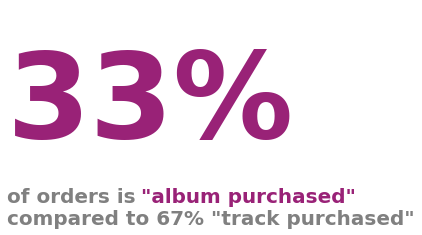

In [14]:
# visuallize our result
fig,ax = plt.subplots()

#optimize data ink
# remove spines
for location in ['left','right','bottom','top']:
    ax.spines[location].set_visible(False)

# remove ticks
ax.tick_params(bottom=False, left=False)

# remove tick labels
ax.set_xticks([])
ax.set_yticks([])

# write the content
ax.text(0,0.4,'33%',size=120, weight='bold', color='#992277')
# write title
ax.text(0,0.1,'of orders is',size=20, weight='bold', color='grey')
ax.text(0.4,0.1,'"album purchased"',size=20, weight='bold', color='#992277')
ax.text(0,0,'compared to 67% "track purchased"',size=20, weight='bold', color='grey')

33% is not a small number, which is nearly 1/3 of the whole order. So maybe our management need more discussion before come to decision.

## Problem 4: Find the percentage of tracks unsold, any recommendation?

### Proportion of tracks unsold

Management want to increase the company profit, they want to know the percentage of tracks without revenue and ask us to propose some recommends for the next orders from record company.

In [15]:
%%sql
DROP VIEW IF EXISTS id_tracks_not_purchased;
CREATE VIEW id_tracks_not_purchased AS
                                SELECT t.track_id
                               FROM track t
                             EXCEPT
                             SELECT DISTINCT il.track_id
                               FROM invoice_line il;
                            
SELECT COUNT(*) num_tracks_not_sold,
       ROUND(COUNT(*)*100.0/(SELECT COUNT(*) FROM track),2)||'%' percentage_not_sold
  FROM id_tracks_not_purchased;

 * sqlite:///chinook.db
Done.
Done.
Done.


num_tracks_not_sold,percentage_not_sold
1697,48.44%


Text(0, 1.45, 'Revenue is generated from only 51.56% of total tracks                                                            ')

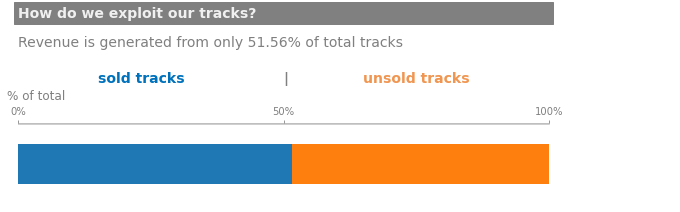

In [16]:
# using stacked horizontal bar graph
d = {'sold_tracks':[0.5156],'not_sold_tracks':[0.4844]} 
sold_vs_not_sold_tracks = pd.DataFrame(data=d)

# plot stacked horizontal bar
ax = sold_vs_not_sold_tracks.plot(kind='barh', figsize=[10,1.5], stacked=True, legend=False)

# Remove spines
for location in ['left','right','bottom','top']:
    ax.spines[location].set_visible(False)

# Remove y-tick, y labels
ax.set_yticks([])

ax.set_xticks([0,0.5,1])


#Move ticks labels at the top of the graph
ax.xaxis.tick_top()

# Adding horizontal line
ax.axhline(0.5,color='grey', linewidth=2.5, alpha=0.5,
          xmin=0, xmax=0.95)

# Edit tick labels
ax.tick_params(axis='x', colors='grey')

# Reformat x tick from 1.0 to 100%
import matplotlib.ticker as mtick
ax.xaxis.set_major_formatter(mtick.PercentFormatter(1.0))

ax.text(-0.02,0.8,'% of total', size = 12, color='grey')

ax.text(0.15,1,'sold tracks', size = 14, color='#0072bc', weight='bold')
ax.text(0.65,1,'unsold tracks', size = 14, color='#f09651', weight='bold')
ax.text(0.5,1,'|', size = 14, color='grey', weight='bold')
ax.text(0,1.8,'How do we exploit our tracks?'+' '*60, size = 14, color='#f0f0f0', weight='bold',backgroundcolor = 'grey')
ax.text(0,1.45,'Revenue is generated from only 51.56% of total tracks'+' '*60, size = 14, color='grey')

So about 48% of our existing tracks are unsold. Our work is to identify the possible underlying reasons and propose some ideas for the purchase department in the next order.

### Finding solutions to improve the situation

We will create a table, called `no_purchased_tracks` for our convenience of interpritation and print first ten rows to understand more about our data.

In [17]:
%%sql
DROP VIEW IF EXISTS no_purchased_tracks;
CREATE VIEW no_purchased_tracks AS
                                SELECT t.*
                                  FROM id_tracks_not_purchased itnp
                                  LEFT JOIN track t ON itnp.track_id = t.track_id;

SELECT *
  FROM no_purchased_tracks
 LIMIT 5;

 * sqlite:///chinook.db
Done.
Done.
Done.


track_id,name,album_id,media_type_id,genre_id,composer,milliseconds,bytes,unit_price
99,Your Time Has Come,11,1,4,"Cornell, Commerford, Morello, Wilk",255529,8273592,0.99
101,Be Yourself,11,1,4,"Cornell, Commerford, Morello, Wilk",279484,9106160,0.99
104,Heaven's Dead,11,1,4,"Cornell, Commerford, Morello, Wilk",276688,9006158,0.99
106,Man Or Animal,11,1,4,"Cornell, Commerford, Morello, Wilk",233195,7542942,0.99
107,Yesterday To Tomorrow,11,1,4,"Cornell, Commerford, Morello, Wilk",273763,8944205,0.99


#### 1. Media type

To come up with some accurate data driven recommendations, we should make some elaborate interpretations. Firstly, we will try to look at the effect of **media type**.

In [18]:
%%sql
SELECT npt.media_type_id,
       mt.name media_type,
       COUNT(npt.track_id) num_tracks_unsold,       
       ROUND(COUNT(npt.track_id)*100.0/total_num_track. Chinook_num_tracks,2)||'%' per_its_type_total
  
  FROM no_purchased_tracks npt
 INNER JOIN media_type mt ON mt.media_type_id = npt.media_type_id
  LEFT JOIN (SELECT media_type_id,
                    COUNT(track_id) Chinook_num_tracks
               FROM track
              GROUP BY media_type_id) total_num_track ON total_num_track.media_type_id = npt.media_type_id
 GROUP BY npt.media_type_id
 ORDER BY num_tracks_unsold DESC;

 * sqlite:///chinook.db
Done.


media_type_id,media_type,num_tracks_unsold,per_its_type_total
1,MPEG audio file,1393,45.91%
3,Protected MPEG-4 video file,211,98.6%
2,Protected AAC audio file,86,36.29%
4,Purchased AAC audio file,4,57.14%
5,AAC audio file,3,27.27%


From the the table above, it is clear that we should not purchase tracks with media type **Protected MPEG-4 video file** because **98.6%** of tracks in this type are unsold. We should also consider tracks in **MPEG audio file**, it would be better to calculate the P&L (profit&lost) of this sector and reduce the number of tracks in this media type. Because it has 1393 tracks unsold, which counts for **45.91%** of total tracks in this type.

#### 2. Genre

In [19]:
%%sql
SELECT npt.genre_id,
       g.name genre,
       COUNT(npt.track_id) num_tracks_unsold,
       ROUND(COUNT(npt.track_id)*100.0/total_num_track. Chinook_num_tracks_genre,2)||'%' per_its_type_total
  FROM no_purchased_tracks npt
 INNER JOIN genre g ON g.genre_id = npt.genre_id
  LEFT JOIN (SELECT genre_id,
                    COUNT(track_id) Chinook_num_tracks_genre
               FROM track
              GROUP BY genre_id) total_num_track ON total_num_track.genre_id = npt.genre_id
 GROUP BY npt.genre_id
 ORDER BY ROUND(COUNT(npt.track_id)*100.0/total_num_track. Chinook_num_tracks_genre,2) DESC
 LIMIT 15;

 * sqlite:///chinook.db
Done.


genre_id,genre,num_tracks_unsold,per_its_type_total
5,Rock And Roll,12,100.0%
11,Bossa Nova,15,100.0%
16,World,28,100.0%
18,Science Fiction,13,100.0%
20,Sci Fi & Fantasy,26,100.0%
22,Comedy,17,100.0%
25,Opera,1,100.0%
21,Drama,63,98.44%
19,TV Shows,91,97.85%
10,Soundtrack,38,88.37%


Some interesting points deserve our attention over there.

* A few genres are totally rejected by consumers, including: **Rock And Roll, Bossa Nova, World, Science Fiction, Sci Fi & Fantasy, Comedy** and **Opera**.
* **Latin** music is a big cost for us too, there are 460 tracks unsold, equivalent to 79.45% of the existing Latin tracks in our store.
* **Drama**, **TV shows** and **Soundtrack** have a high percentage of unsold tracks too with 98.44%, 97.85% and 88.37% respectively.

However to maintain the diversity of products, we should only reduce our order for these types of tracks and try to advertise more to attract customers to these sectors.

## Problem 5: Employee performance

As the year draws to a close, HR department wants to know some information of employees in a sales support agent, based on which they can propose a year - end bonnus for each staff. These are their requirements:
* Find the best 3 employees, who have the highest total sales value and collate information of these employees: employee id, name, title, their manager, birth date, hire date, country, the number of customer, and total sales each employee has.
* Identify who is the best manager based on the total sales generated by the group of sales support agents that he/she supervises.

NOTE: At Chinook store, when a customer makes the first purchase, he/she will be assigned to 1 sales supporter.

To answer our question, we will work on 3 tables: `employee`, `customer` and `invoice`.

Firstly, from the `employee` table, collect all related information required: employee id, name, title, their manager, birth date, hire date, country.

In [20]:
%%sql
DROP VIEW IF EXISTS employee_info;
CREATE VIEW employee_info AS
SELECT e1.employee_id,
       e1. first_name||' '||e1.last_name employee_name,
       e1.title employee_title,
       eb.employee_birthdate,
       eh.employee_hiredate,
       e1.country employee_country,
       e2.employee_id supervisor_id,
       e2.first_name||' '||e2.last_name supervisor_name
  FROM employee e1
  LEFT JOIN (SELECT employee_id,
             SUBSTR(birthdate,1,10) employee_birthdate
               FROM employee) eb ON eb.employee_id = e1.employee_id
  LEFT JOIN (SELECT employee_id,
             SUBSTR(hire_date,1,10) employee_hiredate
               FROM employee) eh ON eh.employee_id = e1.employee_id
  LEFT JOIN employee e2 ON e1.reports_to = e2.employee_id;

SELECT *
  FROM employee_info;

 * sqlite:///chinook.db
Done.
Done.
Done.


employee_id,employee_name,employee_title,employee_birthdate,employee_hiredate,employee_country,supervisor_id,supervisor_name
1,Andrew Adams,General Manager,1962-02-18,2016-08-14,Canada,None,None
2,Nancy Edwards,Sales Manager,1958-12-08,2016-05-01,Canada,1,Andrew Adams
3,Jane Peacock,Sales Support Agent,1973-08-29,2017-04-01,Canada,2,Nancy Edwards
4,Margaret Park,Sales Support Agent,1947-09-19,2017-05-03,Canada,2,Nancy Edwards
5,Steve Johnson,Sales Support Agent,1965-03-03,2017-10-17,Canada,2,Nancy Edwards
6,Michael Mitchell,IT Manager,1973-07-01,2016-10-17,Canada,1,Andrew Adams
7,Robert King,IT Staff,1970-05-29,2017-01-02,Canada,6,Michael Mitchell
8,Laura Callahan,IT Staff,1968-01-09,2017-03-04,Canada,6,Michael Mitchell


Our entreprise has 8 employees in total, where only 3 of them are `Sales Support Agent` and they all live in Canada. Now we will identify the total sales value for each of them.

In [21]:
%%sql
SELECT ei.*,
       ROUND(SUM(i.total),2) total_sales,
       COUNT(i.customer_id) num_customers
       FROM employee_info ei
  LEFT JOIN customer c ON ei.employee_id = c.support_rep_id
  LEFT JOIN invoice i ON c.customer_id = i. customer_id
 WHERE ei.employee_title = 'Sales Support Agent'
 GROUP BY ei.employee_id
 ORDER BY total_sales DESC;

 * sqlite:///chinook.db
Done.


employee_id,employee_name,employee_title,employee_birthdate,employee_hiredate,employee_country,supervisor_id,supervisor_name,total_sales,num_customers
3,Jane Peacock,Sales Support Agent,1973-08-29,2017-04-01,Canada,2,Nancy Edwards,1731.51,212
4,Margaret Park,Sales Support Agent,1947-09-19,2017-05-03,Canada,2,Nancy Edwards,1584.0,214
5,Steve Johnson,Sales Support Agent,1965-03-03,2017-10-17,Canada,2,Nancy Edwards,1393.92,188


As we can see, `Jane Peacock` is the best seller with $ 1731.51 total sales value, while `Margaret Park` has the most number of customer of 214 individuals. And there is a clear positive correlation between entrance date of the worker and his/her sales value. The longer they work for the company, the higher sales they create.

# Conclusion

We have completed a lot of things until now, and succeeded in answering all questions required. Let's summarize our work:

* Our data at Chinook store show that the best 3 among 4 albums to choose for the USA market are  Red Tone (Punk), Slim Jim Bites (Blues), Meteor and the Girls (Pop).
* Our top 3 markets based on the value of total sales are the USA, Canada and Brazil. In addition to providing some required bussiness metrics, we also indicate in this report some recommendation of the most popular genre, beloved artists, best-selling albums for the new marketing campaign there.
* Regarding to the purchasing stratergy, we found that 33% of our customers make an album purchase, so we need to concern more carefully, it is better to identify exactly the P&L of this sector before making final decisions.
* After analysing the data, it is surprising to see that only 51.56% of our tracks generate revenue in our entreprise. We dived in to understand the reasons and try to improve the situation. These are some of our recomendation.
- There are some genre which are totally unsold: **Rock And Roll, Bossa Nova, World, Science Fiction, Sci Fi & Fantasy, Comedy** and **Opera**, **Latin, Drama, TV shows** and **Soundtrack** are costly for us too. However, to maintain the diversity of products, we should only reduce our order for these types of tracks and try to advertise more to attract customers to these sectors.
- Type of Media: 98.6% of Protected MPEG-4 video are unsold.
* Employee performance: Jane Peacock is the best seller with $ 1731.51 total sales value, while Margaret Park has the most number of customer of 214 individuals. 